# Ejercicio 13

Obtener el plano de cuadrados mínimos para la siguiente tabla.

|     |      |      |        |        |        |     |      |     |
|-----|------|------|--------|--------|--------|-----|------|-----|
| $x$ | $-1$ | $-1$ | $0$    | $0$    | $1$    | $2$ | $2$  | $2$ |
| $y$ | $-1$ | $0$  | $0$    | $1$    | $0$    | $0$ | $-1$ | $1$ |
| $f$ | $-4$ | $-2$ | $21.6$ | $-7.3$ | $-5.2$ | $2$ | $0$  | $3$ |

Podemos definir un plano en $\mathbb{R}^3$ con la siguiente ecuación: $\alpha x + \beta y + \gamma = f$.

Sea $A \in \mathbb{R}^{8x3}$ la matriz asociada al plano de cuadrados mínimos de la tabla, y sea $b \in \mathbb{R}^{8x1}$.

$$
A
= \begin{bmatrix}
-1 & -1 & 1 \\
-1 & 0 & 1 \\
0 & 0 & 1 \\
0 & 1 & 1 \\
1 & 0 & 1 \\
2 & 0 & 1 \\
2 & -1 & 1 \\
2 & 1 & 1
\end{bmatrix}
\hspace{2em}
b = \begin{bmatrix}
-4 \\
-2 \\
21.6 \\
-7.3 \\
-5.2 \\
2 \\
0 \\
3
\end{bmatrix}
$$

Buscamos $(\alpha,\beta,\gamma)$ tal que $A^tA(\alpha,\beta,\gamma) = A^tb$. Por ecuaciones normales, $(\alpha,\beta,\gamma)$ es una solución al problema de cuadrados mínimos: $\text{min}_{x \in \mathbb{R}^3} ||Ax - b||_2^2$.

Luego $(\alpha,\beta,\gamma)$ son los coeficientes de la ecuación del plano que mejor aproxima los datos de la tabla.

In [196]:
import numpy as np

x = np.array([-1, -1, 0, 0, 1, 2, 2, 2])
y = np.array([-1, 0, 0, 1, 0, 0, -1, 1])
z = np.array([1, 1, 1, 1, 1, 1, 1, 1])
b = np.array([-4, -2, 21.6, -7.3, -5.2, 2, 0, 3])

A = np.column_stack([x, y, z])
alpha, beta, gamma = np.linalg.solve(A.T @ A, A.T @ b)
print(f"α = {alpha}\nβ = {beta}\nγ = {gamma}")

α = 0.49999999999999994
β = -0.2
γ = 0.7000000000000003


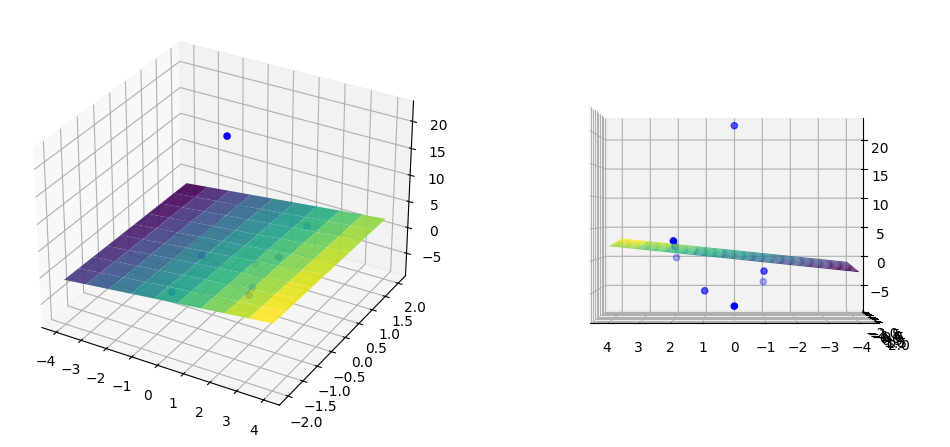

In [197]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1, 2, figsize=(12,8), subplot_kw={"projection": "3d"})
axis[1].view_init(elev=0, azim=90)

for i, ax in enumerate(axis):
    ax.scatter(x, y, b, c="blue")

    xs = np.linspace(-x.max()*2, x.max()*2, 10)
    ys = np.linspace(-y.max()*2, y.max()*2, 10)

    X, Y = np.meshgrid(xs, ys)
    Z = alpha*X + beta*Y + gamma

    ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.9)